## AIVLE School [AI 미니프로젝트] '서울시 생활정보 기반 대중교통 수요 분석'<br>

### 미니프로젝트 안내
* 미션: 버스 노선 추가가 필요한 서울시 내 자치구 선정
* 방법: 1부터 4까지의 ipynb 파일 순서대로 진행하며 데이터 불러오기 및 분석(EDA)을 수행하여 서울시 내 자치구별 정보를 도출하고<br> 이를 바탕으로 5. 데이터 분석에서 버스 노선 추가가 필요한 서울시 내 자치구를 선정해봅니다.<br><br>
* 1. 구별 버스정류장 분석.ipynb<br>
-- 1.1 bus_station_boarding.csv 파일을 활용하여 <span style="color:blue">서울시 내 각 구별 정류장, 노선수, 승하차 고객수를 분석</span>합니다.<br>
  그런데 bus_station_boarding.csv 파일에는 서울시와 경기도의 버스정류장이 모두 포함되어 있기 때문에<br>
  1.2 bus_station_seoul.csv의 정보를 추가로 활용하여 서울시 정류장만 골라내어 분석 대상에 포함시킵니다.<br><br>
* 2. 구별 이동인구 분석.ipynb<br>
-- 2. seoul_moving.csv 파일을 활용하여 <span style="color:blue">서울시 내 구별 이동 시간과 이동 인구를 분석</span>합니다.<br><br>
* 3. 구별 등록인구 분석.ipynb<br>
-- 3. seoul_people.csv 파일을 활용하여 <span style="color:blue">서울시 내 구별 등록인구를 분석</span>합니다. <br><br>
* 4. 구별 업종 분석.ipynb<br>
-- 4. business_type.csv 파일을 활용하여 <span style="color:blue">서울시 내 구별 등록업종을 분석</span>합니다.<br><br>
* 5. 데이터 분석.ipynb<br>
-- 위 1~4에서 도출한 데이터 프레임을 합쳐서 <span style="color:blue">서울시 내 어느 구에 버스 노선을 추가해야 할 지</span> 가설 수립 및 검증 과정을 거쳐 분석합니다.<br> (y값은 정류장 수 또는 노선 수)

---

# 1. 버스정류장 분석
### 버스정류장 데이터를 활용하여 서울시 내 각 구별 정류장 수, 노선 수, 승하차 고객수를 분석합니다.
### 이때, 서울시가 아닌 정류장 정보가 포함되어 있다면 이 정류장들을 제거하고 분석해야 합니다.

## 데이터 안내

[기본 데이터]
* 1.1 bus_station_boarding.csv 
* 서울시 버스노선별 정류장별 승하차 인원 정보
* https://data.seoul.go.kr/dataList/OA-12912/S/1/datasetView.do


[추가 데이터]
* 1.1 bus_station_seoul.csv
* 서울시 버스정류장 위치정보
* https://data.seoul.go.kr/dataList/OA-15067/S/1/datasetView.do

---

# 1.1. 데이터 불러오기

#### [1.1.1] 데이터 로딩
* Pandas 라이브러리를 활용해서 '1.1 bus_station_boarding.csv'파일을 'bus_station' 변수에 저장하세요.
    * 데이터 파일 로딩시 참고 사항 
        * 구분자(sep)는 ',' 입니다
        * cp949 인코더를 사용해 주세요
    * 데이터를 불러올 때 오류가 발생한다면, 오류에 대해 직접 검색하여 해결해보세요.

In [43]:
import sys
import numpy as np
import pandas as pd
import os

In [44]:
# 아래에 코드를 작성하고 결과를 확인합니다.

df = pd.read_csv('C:/Users/user/Desktop/dd/2023.08.21_미니프로젝트1차_실습파일/1.1 bus_station_boarding.csv', encoding = 'cp949')
df_2 = pd.read_csv('C:/Users/user/Desktop/dd/2023.08.21_미니프로젝트1차_실습파일/1.2 bus_station_seoul.csv', encoding = 'utf_8')

In [45]:
# 데이터 프레임의 Shape을 확인합니다.
display(df)
display(df_2)

print(df.shape)
print(df_2.shape)

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자
0,20220401,2112,2112번(면목동~성북동),06243,장안동삼성쉐르빌아파트,31,156,20220404
1,20220401,2112,2112번(면목동~성북동),06242,새서울병원,46,153,20220404
2,20220401,2112,2112번(면목동~성북동),06238,장안동근린공원,11,80,20220404
3,20220401,2112,2112번(면목동~성북동),06309,휘경공고휘경주공아파트,56,65,20220404
4,20220401,100,100번(하계동~용산구청),11428,한성여객종점,9,5,20220404
...,...,...,...,...,...,...,...,...
1169873,20220430,7738,7738번(은평공영차고지~홍제역),12004,수색교,2,32,20220503
1169874,20220430,201,201번(구리~서울역),06278,세종대왕기념관,153,43,20220503
1169875,20220430,강서01,강서01(약수터~등촌역),16555,화곡본동시장,133,6,20220503
1169876,20220430,3321,3321번(강동차고지~강동구청),25236,굽은다리사거리,36,41,20220503


,ARS-ID,정류소명
0,1001,종로2가사거리
1,1002,창경궁.서울대학교병원
2,1003,명륜3가.성대입구
3,1004,종로2가.삼일교
4,1005,혜화동로터리.여운형활동터
...,...,...
10930,25995,우성아파트
10931,25996,우성아파트
10932,25997,조일약국
10933,25998,성내시장


(1169878, 8)
(10935, 2)


---

# 1.2. 기본 정보 확인 및 클렌징

+ 데이터 클렌징 : 결측치, 이상치 등을 제거하여 데이터 분석 결과가 왜곡 되는 문제를 방지하기 위한 정제 과정

#### [1.2.1] 기본 정보 확인하기
* 'bus_station' 데이터의 정보를 확인해보세요.
* 'describe', 'info', 'head', 'tail' 등 전부 활용해 보세요.
* 데이터 중에서 컬럼명으로 봤을 때 int 이어야 할 것 같은데 object인 컬럼들이 있습니다. 왜 그런지 이 컬럼들을 더 분석해보세요.

In [46]:
# 아래에 코드를 작성하고 결과를 확인합니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1169878 entries, 0 to 1169877
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   사용일자        1169878 non-null  int64 
 1   노선번호        1169878 non-null  object
 2   노선명         1169878 non-null  object
 3   버스정류장ARS번호  1169878 non-null  object
 4   역명          1169878 non-null  object
 5   승차총승객수      1169878 non-null  int64 
 6   하차총승객수      1169878 non-null  int64 
 7   등록일자        1169878 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 71.4+ MB


In [47]:
# 아래에 코드를 작성하고 결과를 확인합니다.
print(sum(~df['노선번호'].str.isdigit()))

df['노선번호'].loc[~df['노선번호'].str.isdigit()]

327598


13           N15
16           N15
20           N15
23           N15
28           N15
           ...  
1169859    영등포04
1169860     강서01
1169865     강남08
1169870     강서01
1169875     강서01
Name: 노선번호, Length: 327598, dtype: object

In [48]:
# 아래에 코드를 작성하고 결과를 확인합니다.
print(sum(~df['버스정류장ARS번호'].str.isdigit()))

df['버스정류장ARS번호'].loc[~df['버스정류장ARS번호'].str.isdigit()]

5174


747        ~
852        ~
1048       ~
1252       ~
1479       ~
          ..
1168831    ~
1169138    ~
1169509    ~
1169612    ~
1169735    ~
Name: 버스정류장ARS번호, Length: 5174, dtype: object

In [49]:
# 아래에 코드를 작성하고 결과를 확인합니다.


#### [1.2.2] 버스정류장 위치를 구 별로 구분 하기

* tip! 버스정류장ARS번호의 앞 두자리가 구를 의미합니다.

* '자치구' column을 추가하여 정류장이 위치한 구 이름을 등록해주세요.


In [50]:
code =[[11010,'종로구'],
        [11020,	'중구'],
            [11030,	'용산구'],
            [11040,	'성동구'],
            [11050,	'광진구'],
            [11060,	'동대문구'],
            [11070,	'중랑구'],
            [11080,	'성북구'],
            [11090,	'강북구'],
            [11100,	'도봉구'],
            [11110,	'노원구'],
            [11120,	'은평구'],
            [11130,	'서대문구'],
            [11140,	'마포구'],
            [11150,	'양천구'],
            [11160,	'강서구'],
            [11170,	'구로구'],
            [11180,	'금천구'],
            [11190,	'영등포구'],
            [11200,	'동작구'],
            [11210,	'관악구'],
            [11220,	'서초구'],
            [11230,	'강남구'],
            [11240,	'송파구'],
            [11250,	'강동구']]

seoul_code = pd.DataFrame(code, columns = ['code', 'name'])
seoul_code['자치구코드'] = seoul_code['code'].astype('str').str[2:4]
seoul_code

,code,name,자치구코드
0,11010,종로구,01
1,11020,중구,02
2,11030,용산구,03
3,11040,성동구,04
4,11050,광진구,05
5,11060,동대문구,06
6,11070,중랑구,07
7,11080,성북구,08
8,11090,강북구,09
9,11100,도봉구,10


In [51]:
# 먼저, bus_station에서 버스정류장ARS번호의 정보를 확인해보세요.
df['버스정류장ARS번호']

0          06243
1          06242
2          06238
3          06309
4          11428
           ...  
1169873    12004
1169874    06278
1169875    16555
1169876    25236
1169877    06280
Name: 버스정류장ARS번호, Length: 1169878, dtype: object

In [52]:
# 버스정류장 ARS 번호의 앞자리 2개를 잘라내어 새로 '자치구' 컬럼을 생성합니다
df['자치구'] = df['버스정류장ARS번호'].str[0:2]
df[['자치구', '버스정류장ARS번호']]


,자치구,버스정류장ARS번호
0,06,06243
1,06,06242
2,06,06238
3,06,06309
4,11,11428
...,...,...
1169873,12,12004
1169874,06,06278
1169875,16,16555
1169876,25,25236


In [53]:
# 자치구의 값들이 어떻게 구성되어 있는 지 확인해봅니다. (ex: unique 활용)
df['자치구'].unique()

array(['06', '11', '09', '01', '14', '13', '04', '22', '38', '20', '21',
       '19', '18', '03', '02', '08', '17', '05', '10', '35', '12', '07',
       '68', '16', '~', '42', '49', '39', '15', '23', '44', '25', '24',
       '48', '36', '40', '57', '56', '28', '61', '63', '46', '45', '31',
       '30', '37', '60', '27', '47', '59'], dtype=object)

#### [1.2.3] 서울시 자치구에 해당하는 버스정류장만 추출하기

* 위에서 살펴본 자치구의 값은 숫자 2자리로 구성되어 있습니다. 
* 그런데 서울시 구별 코드정보는 01부터 25까지라고 합니다(도메인지식)
* 그렇다면 01부터 25의 범위를 넘어서는 데이터는 서울시 구별 정보가 아닐 것입니다. 이번 미니프로젝트에서는 서울시에 관한 정보만 분석하고자 하므로 이 데이터를 어떻게 처리하면 좋을지 생각하여 적용해보세요.
* 분석 시의 편의를 위해 숫자 2자리 구별 코드는 구 이름으로 변환해주세요.
* 서울시 구별 코드정보<br>
    '01': '종로구',
    '02': '중구',
    '03': '용산구',
    '04': '성동구',
    '05': '광진구',
    '06': '동대문구',
    '07': '중랑구',
    '08': '성북구',
    '09': '강북구',
    '10': '도봉구',
    '11': '노원구',
    '12': '은평구',
    '13': '서대문구',
    '14': '마포구',
    '15': '양천구',
    '16': '강서구',
    '17': '구로구',
    '18': '금천구',
    '19': '영등포구',
    '20': '동작구',
    '21': '관악구',
    '22': '서초구',
    '23': '강남구',
    '24': '송파구',
    '25': '강동구'

In [54]:
dic = { '01': '종로구',
    '02': '중구',
    '03': '용산구',
    '04': '성동구',
    '05': '광진구',
    '06': '동대문구',
    '07': '중랑구',
    '08': '성북구',
    '09': '강북구',
    '10': '도봉구',
    '11': '노원구',
    '12': '은평구',
    '13': '서대문구',
    '14': '마포구',
    '15': '양천구',
    '16': '강서구',
    '17': '구로구',
    '18': '금천구',
    '19': '영등포구',
    '20': '동작구',
    '21': '관악구',
    '22': '서초구',
    '23': '강남구',
    '24': '송파구',
    '25': '강동구'}
dic

{'01': '종로구',
 '02': '중구',
 '03': '용산구',
 '04': '성동구',
 '05': '광진구',
 '06': '동대문구',
 '07': '중랑구',
 '08': '성북구',
 '09': '강북구',
 '10': '도봉구',
 '11': '노원구',
 '12': '은평구',
 '13': '서대문구',
 '14': '마포구',
 '15': '양천구',
 '16': '강서구',
 '17': '구로구',
 '18': '금천구',
 '19': '영등포구',
 '20': '동작구',
 '21': '관악구',
 '22': '서초구',
 '23': '강남구',
 '24': '송파구',
 '25': '강동구'}

In [55]:
# # 숫자 2자리 구 코드를 구 이름으로 변환합니다
# seoul_bool = df['버스정류장ARS번호'].str[0:2] == '11'
# seoul_df = df.loc[seoul_bool]

# seoul_df['자치구 코드'] = seoul_df.copy()['버스정류장ARS번호'].str[2:4].map(lambda x : dic.get(x, 'no'))
# seoul_df['자치구 코드']

In [56]:
df['자치구 코드'] = df.copy()['자치구'].map(lambda x : dic.get(x, 'no'))
df['자치구 코드']

0          동대문구
1          동대문구
2          동대문구
3          동대문구
4           노원구
           ... 
1169873     은평구
1169874    동대문구
1169875     강서구
1169876     강동구
1169877    동대문구
Name: 자치구 코드, Length: 1169878, dtype: object

In [57]:
df.loc[df['자치구 코드'] == 'no']

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자,자치구,자치구 코드
14,20220401,504,504번(광명공영차고지~남대문),38092,철산주공9단지,4,10,20220404,38,no
15,20220401,504,504번(광명공영차고지~남대문),38095,철산우체국,46,46,20220404,38,no
17,20220401,504,504번(광명공영차고지~남대문),38102,철산주공8단지,27,51,20220404,38,no
18,20220401,504,504번(광명공영차고지~남대문),38085,모세로삼거리.광명시보훈회관,12,108,20220404,38,no
21,20220401,504,504번(광명공영차고지~남대문),38013,광명시청.한국폴리텍대학,107,167,20220404,38,no
...,...,...,...,...,...,...,...,...,...,...
1169830,20220430,5623,5623번(군포 공영차고지~여의도),40034,삼성마을5단지,0,14,20220503,40,no
1169854,20220430,542,542번(군포버스공영차고지~신사역),56033,중촌마을,48,22,20220503,56,no
1169855,20220430,5623,5623번(군포 공영차고지~여의도),40615,군포공영차고지,0,7,20220503,40,no
1169866,20220430,7739,7739번(은평공영차고지~홍대입구역),35331,은평공영차고지,15,0,20220503,35,no


In [58]:
df['자치구 코드']

0          동대문구
1          동대문구
2          동대문구
3          동대문구
4           노원구
           ... 
1169873     은평구
1169874    동대문구
1169875     강서구
1169876     강동구
1169877    동대문구
Name: 자치구 코드, Length: 1169878, dtype: object

In [59]:
# 숫자 2자리 구 코드를 구 이름으로 변환한 결과를 확인해봅니다.
# print(seoul_df['자치구 코드'].unique())
print(df['자치구 코드'].unique())

['동대문구' '노원구' '강북구' '종로구' '마포구' '서대문구' '성동구' '서초구' 'no' '동작구' '관악구' '영등포구'
 '금천구' '용산구' '중구' '성북구' '구로구' '광진구' '도봉구' '은평구' '중랑구' '강서구' '양천구' '강남구'
 '강동구' '송파구']


#### [1.2.4] 결측치 처리

In [60]:
# NaN 값을 제거 합니다.
# 또는 위에서 처리한 방식에 따라 NaN 값이 없는 경우는 자치구 명으로 변환되지 않은 행(서울시 자치구에 해당하지 않는 정보)을 제거합니다
df.isna().sum()

사용일자          0
노선번호          0
노선명           0
버스정류장ARS번호    0
역명            0
승차총승객수        0
하차총승객수        0
등록일자          0
자치구           0
자치구 코드        0
dtype: int64

#### [1.2.5] 데이터 추가 분석 (버스정류장의 위치가 서울시인지 재확인)

* 위에서 버스정류장ARS번호의 앞 2자리로 서울시 자치구에 속한 버스정류장만 추출했습니다. 
* 그런데 이렇게 추출한 버스정류장도 서울시에 속하지 않는 경우가 있어, 추가 데이터를 활용하여 한번 더 서울시 정류장만 추출하려고 합니다.

In [61]:
# 자치구 별로 정류장의 개수를 확인해봅니다. (nunique로 고유값의 갯수만 확인)
df.groupby(['자치구 코드'])['버스정류장ARS번호'].nunique()


자치구 코드
no      1790
강남구      506
강동구      373
강북구      413
강서구      566
관악구      468
광진구      272
구로구      486
금천구      345
노원구      515
도봉구      361
동대문구     306
동작구      442
마포구      568
서대문구     460
서초구      600
성동구      436
성북구      606
송파구      416
양천구      323
영등포구     467
용산구      323
은평구      501
종로구      350
중구       178
중랑구      423
Name: 버스정류장ARS번호, dtype: int64

In [62]:
# 강남구와 서초구에 500개가 넘는 버스정류장이 있습니다. 
# 이 중에 랜덤으로 몇 개를 골라 해당 자치구의 정류장이 맞는 지 확인해 보고자 합니다.
# 강남구의 버스정류장ARS번호 전체값을 출력해, 강남구의 버스정류장ARS번호 하나를 조사(네이버 지도에서 버스정류장 검색)해봅니다.



#### 여기서 잠깐!

* 예를 들어 강남구 정류장 중 하나인 23081 정류장을 네이버지도에서 버스정류장 검색을 해보면 강남구가 아니라 남양주에 위치해 있습니다. 
* 이것은 2015년경 버스 노선을 정리 하면서 서울에서 경기도까지 이어지는 노선들의 버스정류장 ARS번호에 서울시 코드를 부여하여 생긴 현상입니다.(도메인지식) 
* 하지만 우리는 서울시 내의 데이터가 필요하므로 적절한 조치가 필요합니다.

#### [1.2.6] 추가 csv 파일로 서울시 버스정류장만 추출하기
* 위에서 작업한 bus_station 데이터와 서울의 버스 정류장 데이터를 merge하는 방법을 활용해 봅니다.
* 서울의 버스 정류장만 포함하고 있는 csv 파일은 아래와 같이 제공됩니다.
* 파일명: 1.2 bus_station_seoul.csv
* 출처: https://data.seoul.go.kr/dataList/OA-15067/S/1/datasetView.do (서울 열린데이터 광장)

In [63]:
# 데이터 로딩 (1.2 bus_station_seoul.csv 의 데이터를 불러와서 only_seoul 변수에 저장합니다)
# 데이터 로딩 시 오류가 발생하는 경우 검색 등을 통해 encoding 값을 적용해보세요.
df_2

,ARS-ID,정류소명
0,1001,종로2가사거리
1,1002,창경궁.서울대학교병원
2,1003,명륜3가.성대입구
3,1004,종로2가.삼일교
4,1005,혜화동로터리.여운형활동터
...,...,...
10930,25995,우성아파트
10931,25996,우성아파트
10932,25997,조일약국
10933,25998,성내시장


In [64]:
# 두 데이터를 합치기 전에 데이터의 컬럼명을 변경합니다. (버스정류장ARS번호로 맞춥니다.)
df['버스정류장ARS번호'] = df['버스정류장ARS번호'].map(lambda x : 0 if x == '~' else x)
df['버스정류장ARS번호'] = df['버스정류장ARS번호'].astype(int)
merged_data = pd.merge(df, df_2, how = 'left', left_on = '버스정류장ARS번호', right_on = 'ARS-ID')
# merged_data.to_csv('C:/Users/user/Desktop/dd/2023.08.21_미니프로젝트1차_실습파일/kkk.csv')

In [65]:
# bus_station과 only_seoul 데이터를 merge 해봅니다.
bus_seoul = merged_data.loc[~merged_data['ARS-ID'].isna()]
bus_seoul

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자,자치구,자치구 코드,ARS-ID,정류소명
0,20220401,2112,2112번(면목동~성북동),6243,장안동삼성쉐르빌아파트,31,156,20220404,06,동대문구,6243.0,장안동삼성쉐르빌아파트
1,20220401,2112,2112번(면목동~성북동),6242,새서울병원,46,153,20220404,06,동대문구,6242.0,새서울병원
2,20220401,2112,2112번(면목동~성북동),6238,장안동근린공원,11,80,20220404,06,동대문구,6238.0,장안동근린공원
3,20220401,2112,2112번(면목동~성북동),6309,휘경공고휘경주공아파트,56,65,20220404,06,동대문구,6309.0,휘경공고휘경주공아파트
4,20220401,100,100번(하계동~용산구청),11428,한성여객종점,9,5,20220404,11,노원구,11428.0,한성여객종점
...,...,...,...,...,...,...,...,...,...,...,...,...
1169873,20220430,7738,7738번(은평공영차고지~홍제역),12004,수색교,2,32,20220503,12,은평구,12004.0,수색교
1169874,20220430,201,201번(구리~서울역),6278,세종대왕기념관,153,43,20220503,06,동대문구,6278.0,세종대왕기념관
1169875,20220430,강서01,강서01(약수터~등촌역),16555,화곡본동시장,133,6,20220503,16,강서구,16555.0,화곡본동시장
1169876,20220430,3321,3321번(강동차고지~강동구청),25236,굽은다리사거리,36,41,20220503,25,강동구,25236.0,굽은다리사거리


In [66]:
# 버스정류장ARS번호 갯수를 확인해봅니다.
bus_seoul['버스정류장ARS번호'].value_counts()
# bus_seoul.to_csv('C:/Users/user/Desktop/dd/2023.08.21_미니프로젝트1차_실습파일/kkk.csv')

1023     835
1044     819
2142     809
1013     778
1014     776
        ... 
14986      1
14364      1
3554       1
19994      1
20965      1
Name: 버스정류장ARS번호, Length: 10615, dtype: int64

#### [1.2.7] 구 별로 버스 정류장의 개수 확인

In [67]:
bus_seoul

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자,자치구,자치구 코드,ARS-ID,정류소명
0,20220401,2112,2112번(면목동~성북동),6243,장안동삼성쉐르빌아파트,31,156,20220404,06,동대문구,6243.0,장안동삼성쉐르빌아파트
1,20220401,2112,2112번(면목동~성북동),6242,새서울병원,46,153,20220404,06,동대문구,6242.0,새서울병원
2,20220401,2112,2112번(면목동~성북동),6238,장안동근린공원,11,80,20220404,06,동대문구,6238.0,장안동근린공원
3,20220401,2112,2112번(면목동~성북동),6309,휘경공고휘경주공아파트,56,65,20220404,06,동대문구,6309.0,휘경공고휘경주공아파트
4,20220401,100,100번(하계동~용산구청),11428,한성여객종점,9,5,20220404,11,노원구,11428.0,한성여객종점
...,...,...,...,...,...,...,...,...,...,...,...,...
1169873,20220430,7738,7738번(은평공영차고지~홍제역),12004,수색교,2,32,20220503,12,은평구,12004.0,수색교
1169874,20220430,201,201번(구리~서울역),6278,세종대왕기념관,153,43,20220503,06,동대문구,6278.0,세종대왕기념관
1169875,20220430,강서01,강서01(약수터~등촌역),16555,화곡본동시장,133,6,20220503,16,강서구,16555.0,화곡본동시장
1169876,20220430,3321,3321번(강동차고지~강동구청),25236,굽은다리사거리,36,41,20220503,25,강동구,25236.0,굽은다리사거리


In [98]:
# 구 별로 버스 정류장의 개수를 확인해 봅니다.
# 구 별 버스정류장 개수로 구성된 데이터프레임을 seoul_bus_station_ARS에 저장합니다.(groupby 함수에서 as_index 옵션을 사용해보세요)

kk = bus_seoul.groupby(['자치구 코드']).apply(lambda x : len(x['버스정류장ARS번호'].unique())).to_frame().stack().to_frame().reset_index()
kk = kk.iloc[:,[0,2]]
kk.columns = ['자치구 코드', '버스 정류장 수']
seoul_bus_station_ARS = kk
seoul_bus_station_ARS.set_index(['자치구 코드'], inplace = True)
seoul_bus_station_ARS

,버스 정류장 수
자치구 코드,
강남구,499
강동구,369
강북구,413
강서구,566
관악구,466
광진구,269
구로구,486
금천구,345
노원구,514


#### [1.2.8] 구 별로 버스 노선이 몇 개 지나가는 지 확인
* 구 별로 버스 노선의 개수 확인

In [99]:
# 구 별로 버스 노선 개수를 확인해 봅니다.
# 구 별 버스 노선 개수로 구성된 데이터프레임을 seoul_bus_station_line에 저장합니다.

kk = bus_seoul.groupby(['자치구 코드']).apply(lambda x : len(x['노선번호'].unique())).to_frame().stack().to_frame().reset_index()
kk = kk.iloc[:,[0,2]]
kk.columns = ['자치구 코드', '버스 노선 수']
seoul_bus_station_line = kk
seoul_bus_station_line.set_index(['자치구 코드'], inplace = True)
seoul_bus_station_line

,버스 노선 수
자치구 코드,
강남구,91
강동구,21
강북구,67
강서구,49
관악구,86
광진구,41
구로구,79
금천구,58
노원구,57


#### [1.2.9] 구 별로 승차 총 승객수, 하차 총 승객수 확인

In [100]:
# 구 별 승차총승객수, 하차총승객수를 확인해봅니다.
# 구 별 승차총승객수, 하차총승객수로 구성된 데이터프레임을 seoul_bus_station_sum에 저장합니다.

kk = bus_seoul.groupby(['자치구 코드'])[['승차총승객수', '하차총승객수']].sum()
seoul_bus_station_sum = kk
seoul_bus_station_sum

,승차총승객수,하차총승객수
자치구 코드,,
강남구,8030483,7569213
강동구,2890053,2830506
강북구,4825181,4671783
강서구,4681083,4652828
관악구,7655819,7792476
광진구,2749448,2753411
구로구,4942197,4730992
금천구,3776658,3581930
노원구,4353295,4292724


#### [1.2.10] 구 별로 승차 평균 승객수, 하차 평균 승객수 확인

In [109]:
# 구 별 승차 승객수, 하차 승객수의 평균을 확인해봅니다.
# 구 별 승차 승객수, 하차 승객수의 평균으로 구성된 데이터프레임을 seoul_bus_station_mean에 저장합니다.
# 컬럼명은 승차평균승객수, 하차평균승객수로 바꾸세요.

kk = bus_seoul.groupby(['자치구 코드'])[['승차총승객수', '하차총승객수']].mean()
kk.columns = ['승차총승객수 평균', '하차총승객수 평균']
seoul_bus_station_mean = kk
seoul_bus_station_mean

,승차총승객수 평균,하차총승객수 평균
자치구 코드,,
강남구,128.767927,121.371512
강동구,99.161194,97.118065
강북구,133.020373,128.791504
강서구,88.119480,87.587591
관악구,154.753674,157.516040
광진구,118.352546,118.523137
구로구,119.235615,114.140076
금천구,123.098370,116.751304
노원구,88.476211,87.245168


#### [1.2.11] 데이터 프레임 합치기

In [110]:
# 4개의 데이터 프레임을 합쳐서 seoul_bus_station에 저장해보세요.

# seoul_bus_station_ARS
# seoul_bus_station_line
# seoul_bus_station_sum
# seoul_bus_station_mean
seoul_bus_station = pd.concat([seoul_bus_station_ARS, seoul_bus_station_line, seoul_bus_station_sum, seoul_bus_station_mean], axis = 1)
seoul_bus_station.reset_index(inplace = True)
seoul_bus_station.to_csv('C:/Users/user/Desktop/dd/2023.08.21_미니프로젝트1차_실습파일/df_seoul_bus_station.csv')

In [111]:
# 해당 데이터프레임을 'df_seoul_bus_station.csv' 파일로 저장하세요.
seoul_bus_station

,자치구 코드,버스 정류장 수,버스 노선 수,승차총승객수,하차총승객수,승차총승객수 평균,하차총승객수 평균
0,강남구,499,91,8030483,7569213,128.767927,121.371512
1,강동구,369,21,2890053,2830506,99.161194,97.118065
2,강북구,413,67,4825181,4671783,133.020373,128.791504
3,강서구,566,49,4681083,4652828,88.119480,87.587591
4,관악구,466,86,7655819,7792476,154.753674,157.516040
5,광진구,269,41,2749448,2753411,118.352546,118.523137
6,구로구,486,79,4942197,4730992,119.235615,114.140076
7,금천구,345,58,3776658,3581930,123.098370,116.751304
8,노원구,514,57,4353295,4292724,88.476211,87.245168
9,도봉구,359,46,3304305,3211421,106.859356,103.855540


---

# 1.3.데이터 분석하기
+ 데이터의 형태를 살펴보고 다양한 분석기법을 통해 모델링에 적합하도록 정제요소를 선별하세요.
  * 데이터들의 패턴 탐색
  * 변수들간의 관계 파악

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# 시각화 한글폰트 설정
# 맑은 고딕

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

# scipy
import scipy.stats as spst  

#### [1.3.1] 데이터 분포 알아보기
* 다양한 변수를 기준으로 그래프를 그려보고 인사이트를 도출해보세요.

In [128]:
import matplotlib.pyplot as plt
import numpy as np

def draw_bar_graphs(dataframe, index_column=None, num_cols=2, figsize=(20, 15), gap=0.5):
    if index_column:
        dataframe = dataframe.set_index(index_column)

    numeric_columns = dataframe.select_dtypes(include=['number']).columns
    num_plots = len(numeric_columns)
    num_rows = int(np.ceil(num_plots / num_cols))

    # Create subplots using constrained_layout
    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize, constrained_layout=True)
    axes = axes.flatten()

    # Loop through numeric columns and create bar graphs
    for i, col in enumerate(numeric_columns):
        ax = axes[i]
        dataframe[col].plot(kind='bar', ax=ax)
        ax.set_title(col)
        ax.set_xlabel(index_column if index_column else "Index")
        ax.set_ylabel("Value")
        plt.setp(ax.get_xticklabels(), rotation=45, ha="right")  # Rotate x-axis labels for better readability

    # Hide any unused subplots
    for i in range(num_plots, num_rows * num_cols):
        axes[i].axis('off')

    plt.show()

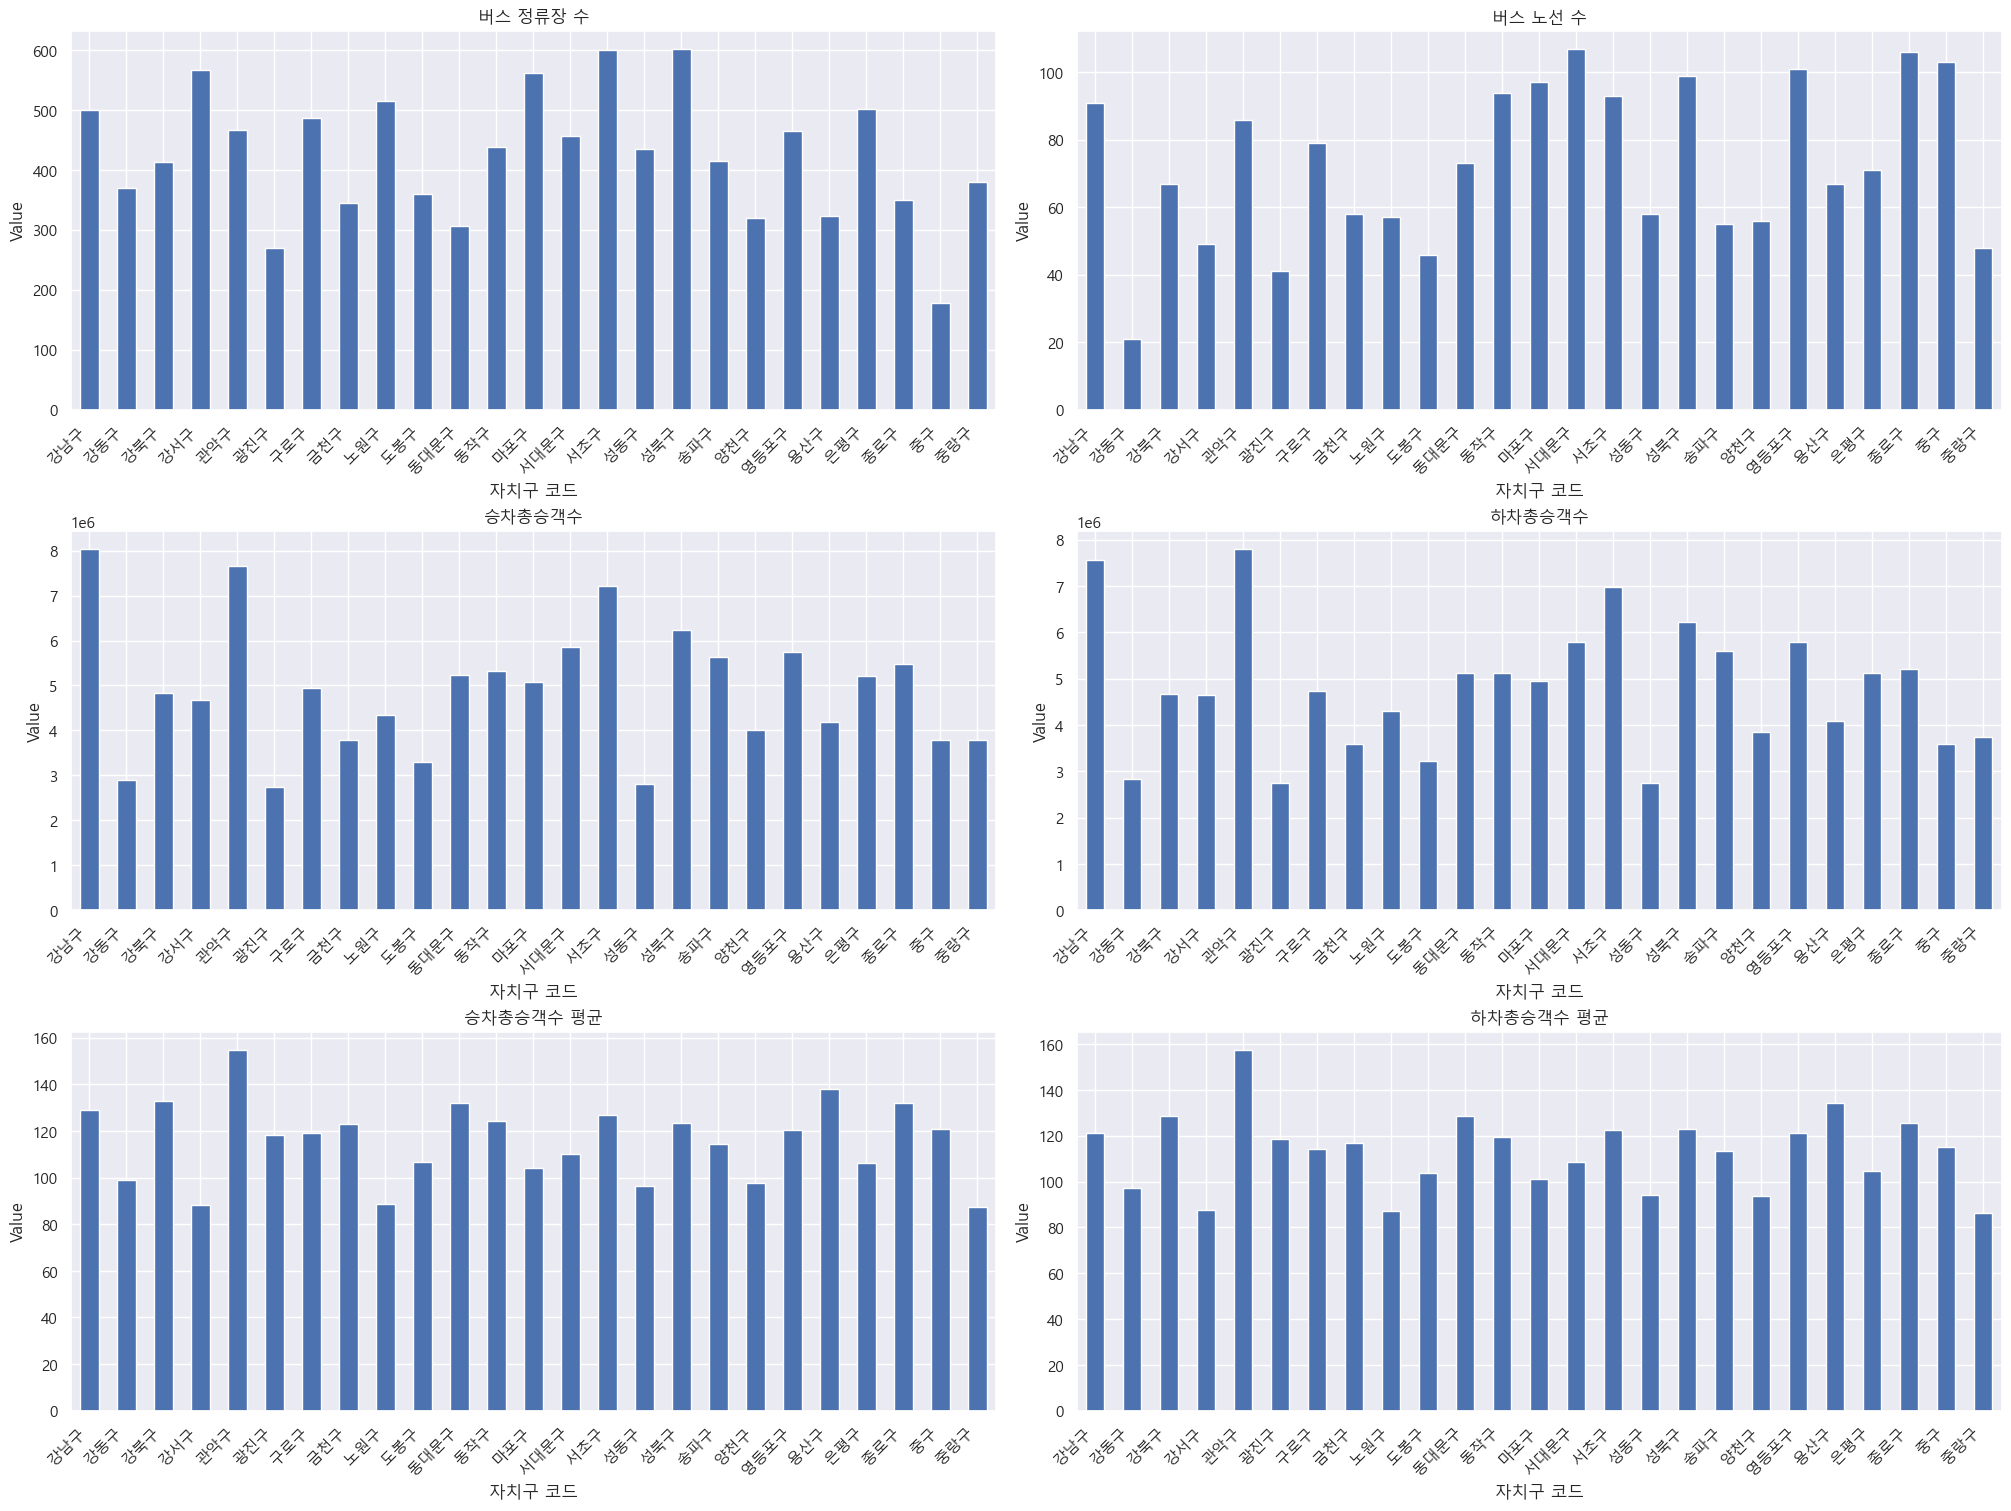

In [129]:
draw_bar_graphs(seoul_bus_station, index_column='자치구 코드')

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_heatmap(dataframe):
    numeric_columns = dataframe.select_dtypes(include=['number'])

    plt.figure(figsize=(10, 8))
    sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', center=0)
    plt.title("Correlation Heatmap of Numeric Variables")
    plt.show()

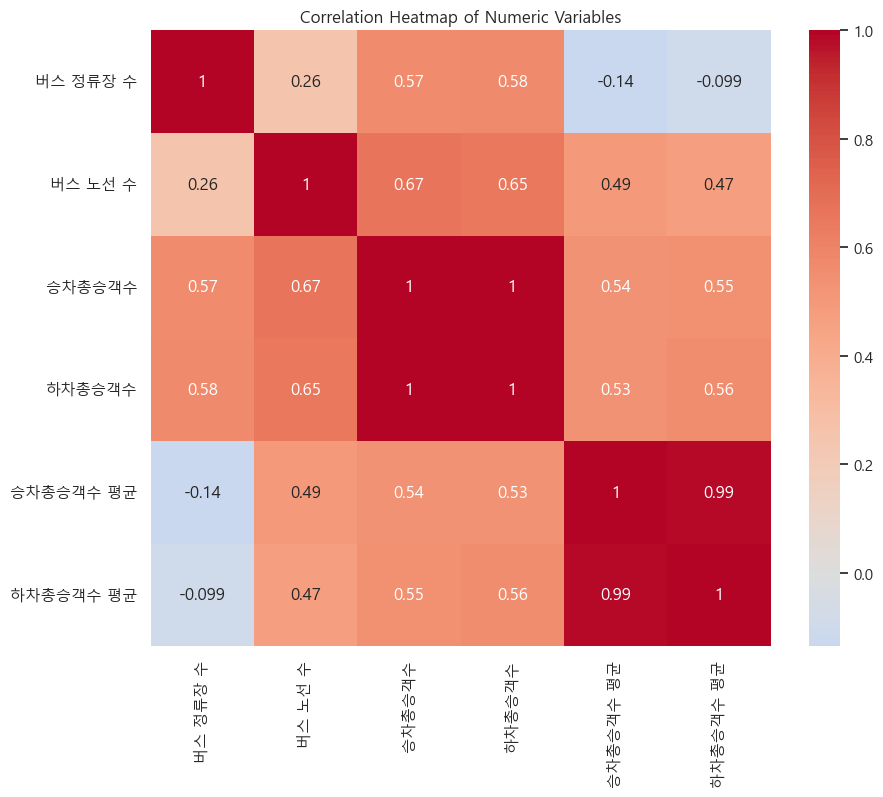

In [127]:
plot_heatmap(seoul_bus_station)

---